<a href="https://colab.research.google.com/github/Pallabpal/market_segmentation_proj/blob/main/market_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import all libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import numpy as np
from sklearn.mixture import GaussianMixture
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import re
import statsmodels.api as sm
import statsmodels.graphics.regressionplots as smg
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz
import statsmodels.formula.api as smf

## Load dataset

In [95]:
mcdonalds=pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")

In [96]:
print(mcdonalds.shape)
print(mcdonalds.head(3))

(1453, 15)
  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  


In [97]:
#Convert the dataset to a matrix and encode "Yes" as 1 and "No" as 0
md_x = mcdonalds.iloc[:, 0:11].replace({'Yes': 1, 'No': 0}).values
md_x.shape

(1453, 11)

In [98]:
cols=mcdonalds.columns[0:11]
mk = pd.DataFrame(md_x, columns=cols)
col_means = np.round(np.mean(md_x, axis=0), 2)
print(col_means)

[0.55 0.91 0.09 0.87 0.53 0.9  0.6  0.64 0.36 0.2  0.24]


## Perform PCA

In [7]:
pca = PCA()
md_pca = pca.fit_transform(md_x)
print(pca.components_)

[[-0.47693349 -0.15533159 -0.00635636  0.11623168  0.3044427  -0.10849325
  -0.33718593 -0.47151394  0.32904173 -0.21371062  0.37475293]
 [ 0.36378978  0.016414    0.01880869 -0.03409395 -0.06383884 -0.0869722
  -0.61063276  0.3073178   0.60128596  0.07659344 -0.13965633]
 [-0.30444402 -0.0625153  -0.03701866 -0.32235949 -0.80237317 -0.06464172
  -0.14931026 -0.28726479  0.02439661  0.19205128 -0.08857138]
 [ 0.0551622  -0.14242496  0.19761927 -0.35413876  0.2539601  -0.09736269
   0.11895823 -0.00254696  0.06781599  0.76348804  0.36953871]
 [-0.30753507  0.27760805  0.07062017 -0.07340475  0.36139895  0.10793025
  -0.12897259 -0.21089912 -0.00312457  0.28784553 -0.72920859]
 [ 0.17073819 -0.34783006 -0.3550866  -0.40651542  0.20934711 -0.59463206
  -0.10324067 -0.07691443 -0.26134151 -0.17822612 -0.21087805]
 [-0.28051863 -0.05973793  0.70763705 -0.38594277  0.03616962 -0.08684577
  -0.04044934  0.36045348 -0.06838452 -0.34961569 -0.02679159]
 [ 0.01304117 -0.11307868  0.37593402  0.5

In [8]:
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.cumsum())

[0.29944723 0.19279721 0.13304535 0.08309578 0.05948052 0.05029956
 0.0438491  0.03954779 0.0367609  0.03235329 0.02932326]
[0.29944723 0.49224445 0.6252898  0.70838558 0.7678661  0.81816566
 0.86201476 0.90156255 0.93832345 0.97067674 1.        ]


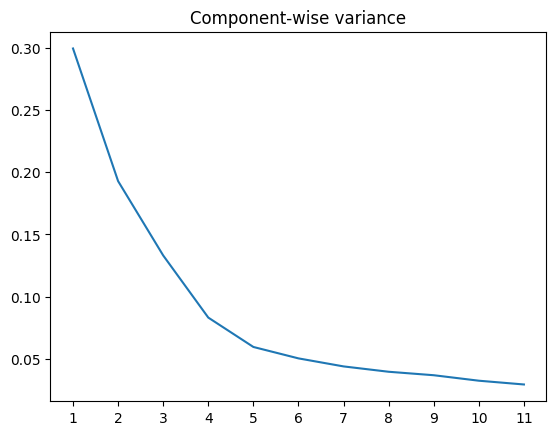

In [9]:
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_)
plt.title("Component-wise variance")
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.show()

In [10]:
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(md_x.shape[1])], index=mcdonalds.columns[:11])
print(loadings)

                 PC1       PC2       PC3       PC4       PC5       PC6  \
yummy      -0.476933  0.363790 -0.304444  0.055162 -0.307535  0.170738   
convenient -0.155332  0.016414 -0.062515 -0.142425  0.277608 -0.347830   
spicy      -0.006356  0.018809 -0.037019  0.197619  0.070620 -0.355087   
fattening   0.116232 -0.034094 -0.322359 -0.354139 -0.073405 -0.406515   
greasy      0.304443 -0.063839 -0.802373  0.253960  0.361399  0.209347   
fast       -0.108493 -0.086972 -0.064642 -0.097363  0.107930 -0.594632   
cheap      -0.337186 -0.610633 -0.149310  0.118958 -0.128973 -0.103241   
tasty      -0.471514  0.307318 -0.287265 -0.002547 -0.210899 -0.076914   
expensive   0.329042  0.601286  0.024397  0.067816 -0.003125 -0.261342   
healthy    -0.213711  0.076593  0.192051  0.763488  0.287846 -0.178226   
disgusting  0.374753 -0.139656 -0.088571  0.369539 -0.729209 -0.210878   

                 PC7       PC8       PC9      PC10      PC11  
yummy      -0.280519  0.013041  0.572403 -0.1102

## Perform hierarchical clustering

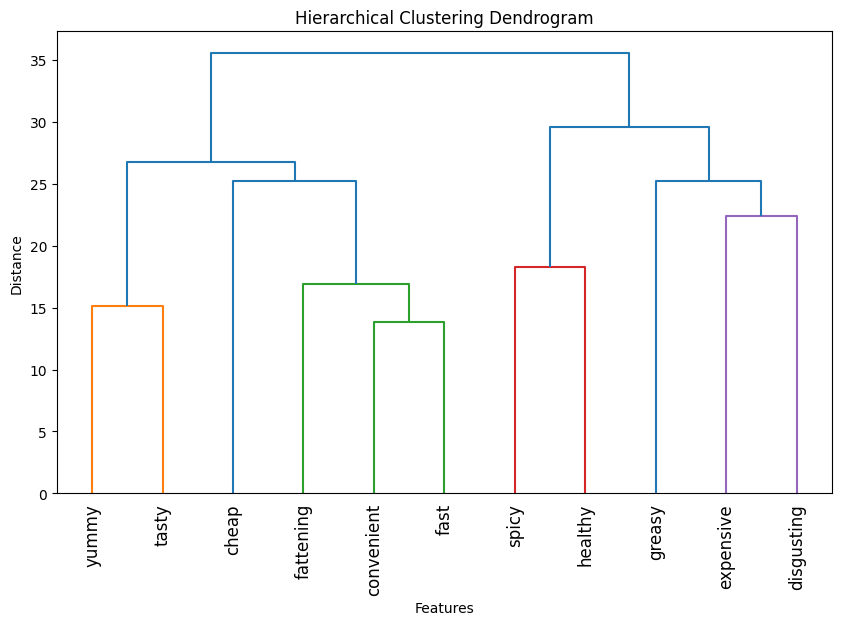

In [11]:
linkage_matrix = linkage(md_x.T, method='complete', metric='euclidean')
plt.figure(figsize=(10, 6))
dendrogram(linkage_matrix, labels=mcdonalds.columns[:11], leaf_rotation=90)
plt.xlabel('Features')
plt.ylabel('Distance')
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

Plot PCA

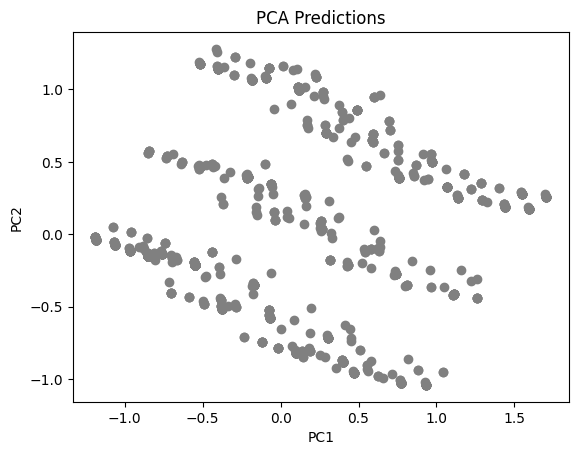

In [12]:
plt.scatter(md_pca[:, 0], md_pca[:, 1], c='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Predictions')
plt.show()

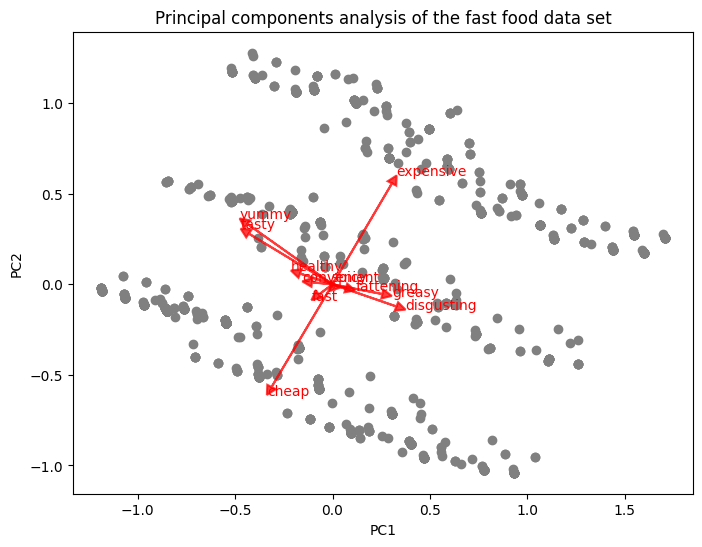

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(md_pca[:, 0], md_pca[:, 1], c='grey')
for i, feature in enumerate(mcdonalds.columns[:11]):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.75,
              head_width=0.05, head_length=0.05, linewidth=1.5, length_includes_head=True)
    plt.text(pca.components_[0, i], pca.components_[1, i], feature, color='r')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Principal components analysis of the fast food data set')
plt.show()

## Perform Kmeans

<function matplotlib.pyplot.show(close=None, block=None)>

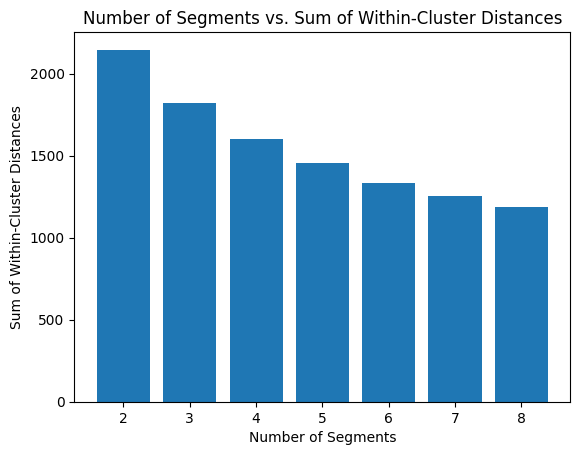

In [27]:
np.random.seed(1234)

k_values = range(2, 9)  # Range of number of clusters (2 to 8)
within_cluster_distances = []

for k in k_values:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(md_x)
    within_cluster_distances.append(kmeans.inertia_)


# Plot the number of segments vs. within-cluster distances
plt.bar(k_values, within_cluster_distances)
plt.xlabel('Number of Segments')
plt.ylabel('Sum of Within-Cluster Distances')
plt.title('Number of Segments vs. Sum of Within-Cluster Distances')
plt.xticks(k_values)
plt.show

## Global Stability Box Plot

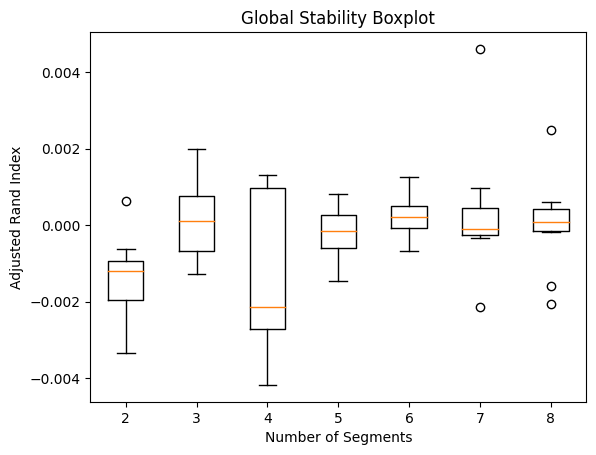

In [15]:
np.random.seed(1234)
nrep = 10  # Number of repetitions
nboot = 100  # Number of bootstrap samples
adjusted_rand_indices = []
for k in k_values:
    rand_indices = []
    for _ in range(nrep):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(md_x)
        labels = kmeans.labels_
        bootstrap_labels = np.random.choice(labels, size=len(labels), replace=True)
        rand_index = adjusted_rand_score(labels, bootstrap_labels)
        rand_indices.append(rand_index)

    adjusted_rand_indices.append(rand_indices)
plt.boxplot(adjusted_rand_indices, labels=k_values)
plt.xlabel('Number of Segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability Boxplot')
plt.show()


## Log likelihood by GaussianMixture

In [21]:
np.random.seed(1234)
k_range = range(2, 9)
n_rep = 10
model_list = []
for k in k_range:
    model = GaussianMixture(n_components=k, covariance_type='full', n_init=n_rep, random_state=1234)
    model.fit(md_x)
    model_list.append(model)
for i, model in enumerate(model_list):
    print(f"Model for k={k_range[i]}:")
    print(f"Number of components: {model.n_components}")
    print(f"Log-likelihood: {model.lower_bound_}")
    print()

Model for k=2:
Number of components: 2
Log-likelihood: 7.672278681921454

Model for k=3:
Number of components: 3
Log-likelihood: 8.693052892177352

Model for k=4:
Number of components: 4
Log-likelihood: 12.580581311075147

Model for k=5:
Number of components: 5
Log-likelihood: 15.299349513074743

Model for k=6:
Number of components: 6
Log-likelihood: 17.082508545476276

Model for k=7:
Number of components: 7
Log-likelihood: 17.334778019014315

Model for k=8:
Number of components: 8
Log-likelihood: 18.199530604548638



## k-inertia

In [28]:
k_range = range(2, 9)
n_rep = 10

model_list = []
for k in k_range:
    model = KMeans(n_clusters=k, n_init=n_rep, random_state=1234)
    model.fit(md_x)
    model_list.append(model)
for i, model in enumerate(model_list):
    print(f"Model for k={k_range[i]}:")
    print(f"Number of clusters: {model.n_clusters}")
    print(f"Inertia: {model.inertia_}")
    print()

Model for k=2:
Number of clusters: 2
Inertia: 2145.5037269171667

Model for k=3:
Number of clusters: 3
Inertia: 1818.7176591653915

Model for k=4:
Number of clusters: 4
Inertia: 1604.1072915407929

Model for k=5:
Number of clusters: 5
Inertia: 1434.6104173514616

Model for k=6:
Number of clusters: 6
Inertia: 1331.6524400071644

Model for k=7:
Number of clusters: 7
Inertia: 1248.4178870553128

Model for k=8:
Number of clusters: 8
Inertia: 1182.1000186138824



## OLS regression

In [31]:
mcdonalds['Like'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')
like_counts = mcdonalds['Like'].value_counts()
print(like_counts)
feature_cols = mcdonalds.columns[1:12]  # Exclude the first column (unnamed)
formula = 'Like ~ ' + ' + '.join(feature_cols)
model = smf.ols(formula=formula, data=mcdonalds).fit()
print(model.summary())

 3.0    229
 2.0    187
 0.0    169
 4.0    160
 1.0    152
-3.0     73
-4.0     71
-2.0     59
-1.0     58
Name: Like, dtype: int64
                            OLS Regression Results                            
Dep. Variable:                   Like   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 4.157e+31
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:41:19   Log-Likelihood:                 36829.
No. Observations:                1158   AIC:                        -7.363e+04
Df Residuals:                    1146   BIC:                        -7.357e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025    

In [100]:
df =mcdonalds
df['Like.n'] = df['Like'].apply(lambda x: int(re.findall(r'[-+]?\d+', x)[0]))
print(df['Like.n'].value_counts())
independent_vars = df.columns[1:11] 
formula = "Like.n ~ " + " + ".join(independent_vars)

 3    229
 2    187
 0    169
 4    160
 1    152
-5    152
 5    143
-3     73
-4     71
-2     59
-1     58
Name: Like.n, dtype: int64


In [44]:
print("Regression Formula:", formula)

Regression Formula: Like.n ~ convenient + spicy + fattening + greasy + fast + cheap + tasty + expensive + healthy + disgusting


In [45]:
np.random.seed(1234)

# Reverse the levels of the 'Like' variable
mcdonalds['Like'] = 6 - pd.to_numeric(mcdonalds['Like'], errors='coerce')

# Encode the categorical variables
encoder = LabelEncoder()
for column in mcdonalds.select_dtypes(include='object'):
    mcdonalds[column] = encoder.fit_transform(mcdonalds[column].astype(str))

# Create the formula for the regression model
feature_cols = mcdonalds.columns[1:12]  # Exclude the first column (unnamed)
formula = 'Like ~ ' + ' + '.join(feature_cols)

# Fit the initial regression model
model = sm.OLS.from_formula(formula, data=mcdonalds).fit()

# Perform stepwise regression
selected_features = []
for feature in feature_cols:
    if feature not in selected_features:
        formula = f'Like ~ {" + ".join(selected_features + [feature])}'
        temp_model = sm.OLS.from_formula(formula, data=mcdonalds).fit()
        if temp_model.aic < model.aic:
            model = temp_model
            selected_features.append(feature)

# Print the final model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Like   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 6.374e+31
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        11:46:44   Log-Likelihood:                 37077.
No. Observations:                1158   AIC:                        -7.413e+04
Df Residuals:                    1146   BIC:                        -7.407e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.114e-14    6.6e-16    -16.871      0.0

## cluster using GaussianMixture

In [46]:
df = mcdonalds


X = mk.iloc[:, 1:13].values 
y = df['Like.n']  

np.random.seed(1234)

# Fit the finite mixture of linear regression models using the EM algorithm
n_components = 2
gmm = GaussianMixture(n_components=n_components, n_init=10)
gmm.fit(X)
cluster_labels = gmm.predict(X)

cluster_sizes = np.bincount(cluster_labels)


for i, size in enumerate(cluster_sizes):
    print("Cluster", i+1, "size:", size)

Cluster 1 size: 985
Cluster 2 size: 468


## Convergence

In [47]:
converged_iter = gmm.n_iter_
print("Convergence after", converged_iter, "iterations")

Convergence after 8 iterations


In [48]:
up_cols = mk.columns[1:13]
df = mcdonalds


X = mk.iloc[:, 1:13] 
y = df['Like.n']  


np.random.seed(1234)

# Fit the GaussianMixture model
n_components = 2
gmm = GaussianMixture(n_components=n_components, n_init=10)
gmm.fit(X)

# Refit the GaussianMixture model for each component separately
models = []
for i in range(n_components):
    component_indices = np.where(gmm.predict(X) == i)[0]
    X_component = X.iloc[component_indices]
    y_component = y.iloc[component_indices]
    
    model = sm.OLS(y_component, sm.add_constant(X_component))
    result = model.fit()
    models.append(result)

# Print the summary for each component
for i, model in enumerate(models):
    print(f"Component {i+1}:")
    print(model.summary())

Component 1:
                            OLS Regression Results                            
Dep. Variable:                 Like.n   R-squared:                       0.310
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     54.83
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           1.30e-73
Time:                        11:51:55   Log-Likelihood:                -2054.9
No. Observations:                 985   AIC:                             4128.
Df Residuals:                     976   BIC:                             4172.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
convenient -1.411e+13   9.35e+12     -1

In [52]:
X = mk.iloc[:, 1:].values  
y = df['Like.n'].values  
np.random.seed(1234)
n_components = 2
gmm = GaussianMixture(n_components=n_components, n_init=10)
gmm.fit(X)
models = []
for i in range(n_components):
    component_indices = np.where(gmm.predict(X) == i)[0]
    X_component = X[component_indices]
    y_component = y[component_indices]

    model = sm.OLS(y_component, sm.add_constant(X_component))
    result = model.fit()
    models.append(result)


## Significance of Parameter Component-1

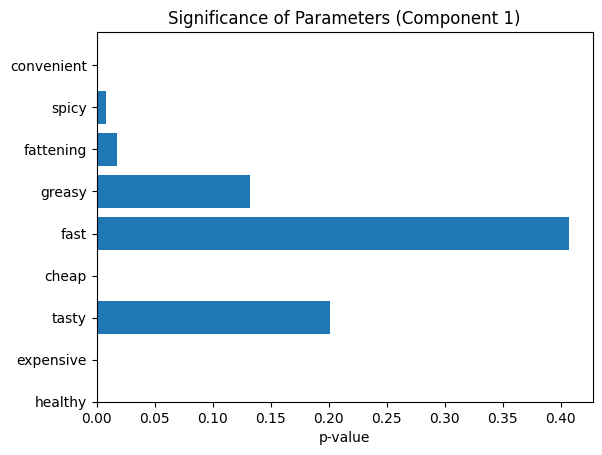

In [53]:
component_index = 0  
result = models[component_index]


pvalues = result.pvalues[1:]  
labels = df.columns[1:10]  
y_pos = np.arange(len(labels))
fig, ax = plt.subplots()
ax.barh(y_pos, pvalues, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()  
ax.set_xlabel('p-value')
ax.set_title(f"Significance of Parameters (Component {component_index+1})")

plt.show()

## K-means PCA

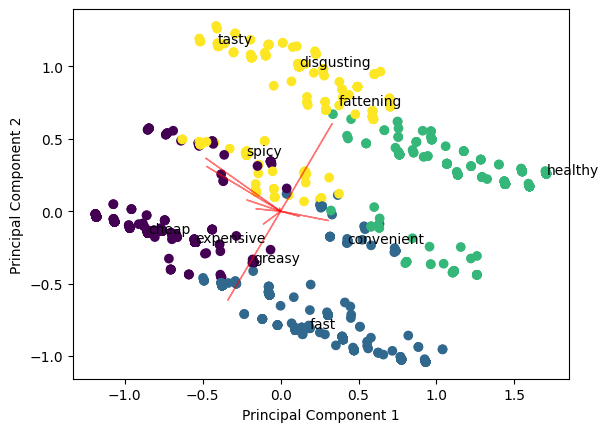

In [54]:
kmeans = KMeans(n_clusters=4, random_state=1234)
kmeans.fit(md_x)

# Perform PCA transformation on the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(md_x)
lt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
column_names = mk.columns[1:13]

for i, name in enumerate(column_names):
    plt.annotate(name, (X_pca[i, 0], X_pca[i, 1]))
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='red', alpha=0.5)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [55]:
k4 = kmeans.labels_

## change remainung categorical column to numeric column

In [102]:
visit_mapping = {
    'Every three months': 3,
    'Once a month':1,
    'Once a year':12,
     'Once a week':4,
     'Never':0,
     'More than once a week':8
}
mk['VisitFrequency'] = df['VisitFrequency'].map(visit_mapping)
gender_mapping = {
    'Female': 0,
    'Male':1,
}
mk['Gender'] = df['Gender'].map(gender_mapping)
mk['Age'] = df['Age']
mk['Like.n'] = df['Like.n']

 ## Print the mean visit frequency for each cluster

In [57]:
visit = df.groupby(k4)['VisitFrequency'].mean()

In [58]:
print(visit)

0    2.614035
1    2.718579
2    2.706612
3    2.536145
Name: VisitFrequency, dtype: float64


Install graphviz

In [59]:
pip install graphviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Plot the tree

In [112]:
features = ['Like.n', 'Age', 'VisitFrequency', 'Gender']
X = mk[features]
# Create a Decision Tree classifier
tree_model = DecisionTreeClassifier(random_state=123)
tree_model.fit(X, k4)
# Plot the decision tree
dot_data = export_graphviz(tree_model, out_file=None, feature_names=features, filled=True, rounded=True, class_names=True)
graph = graphviz.Source(dot_data, format='png') 
graph.format = 'png'  # Set the output format to PNG for better control over image size
graph.render('decision_tree', view=False, format='png')  # Render the graph to a file
display(Image(filename='decision_tree.png'))

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.596024 to fit


In [109]:
from IPython.display import display, Image